In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei' 
%matplotlib inline

data1 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail1')
data2 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail2')
data3 = pd.read_excel('meal_order_detail.xlsx',sheet_name='meal_order_detail3')

data = pd.concat([data1,data2,data3],axis=0)  
# data.head(5)
data.dropna(axis=1,inplace=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [2]:
# cooking.to_csv('df.csv', index=False)

In [3]:
data.head()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442


In [4]:
#average price
round(data['amounts'].mean(),2)  
round(np.mean(data['amounts']),2)  

44.82

In [5]:
data = data.drop(['itemis_add','add_inprice'], axis=1)

In [6]:
#corr(correlation
data.corr()
#see 

,detail_id,order_id,dishes_id,counts,amounts,emp_id
detail_id,1.000000,0.378561,0.021097,-0.036164,0.023094,0.080570
order_id,0.378561,1.000000,0.068024,0.015109,-0.015909,0.069614
dishes_id,0.021097,0.068024,1.000000,0.016497,-0.056888,0.012460
counts,-0.036164,0.015109,0.016497,1.000000,-0.159264,-0.006714
amounts,0.023094,-0.015909,-0.056888,-0.159264,1.000000,0.006354
emp_id,0.080570,0.069614,0.012460,-0.006714,0.006354,1.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


<AxesSubplot:>

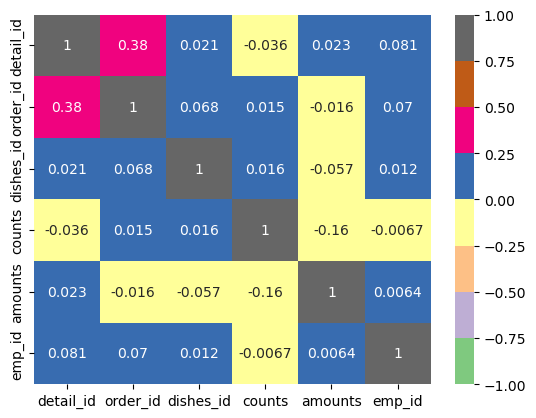

In [7]:
import seaborn as sns  
sns.heatmap(data=data.corr(),annot=True,cmap='Accent',vmax=1,vmin=-1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39277 (\N{CJK UNIFIED IDEOGRAPH-996D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30871 (\N{CJK UNIFIED IDEOGRAPH-7897}) missin

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


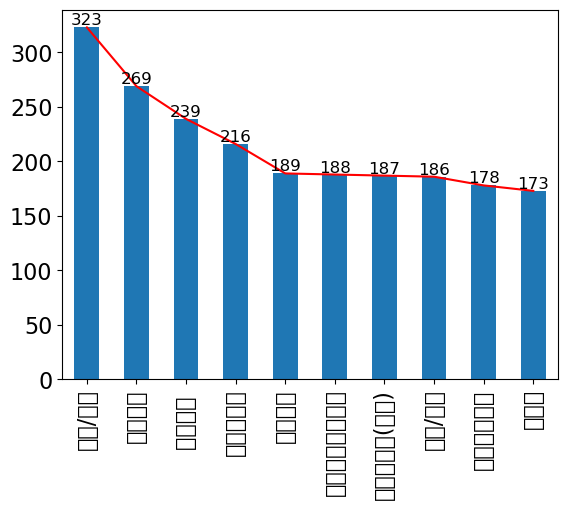

In [8]:
# see the top 10 popular dishes
dishes_count = data['dishes_name'].value_counts()[:10]
# print(dishes_count)

dishes_count.plot(kind='line',color=['r'])
dishes_count.plot(kind='bar',fontsize=16)
for x,y in enumerate(dishes_count):
    print(x,y)
    plt.text(x,y+2,y,ha='center',fontsize=12)

Text(0, 0.5, '点菜种类')

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33756 (\N{CJK UNIFIED IDEOGRAPH-83DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\

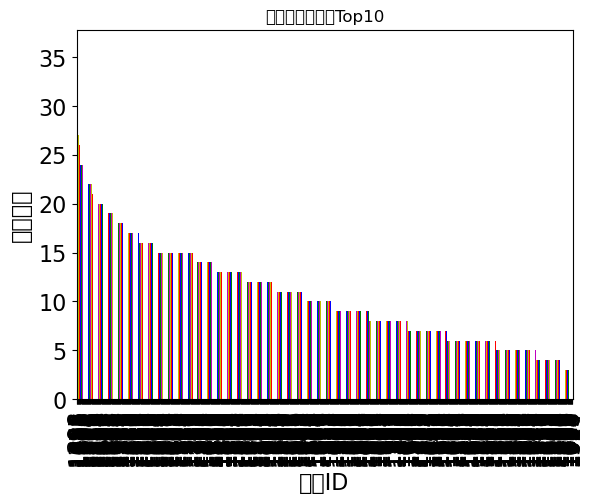

In [9]:
#订单点菜的种类最多（1，1，1    1，2，3）
data_group = data['order_id'].value_counts()[:]
data_group.plot(kind='bar',fontsize=16,color=['r','m','b','y','g'])
plt.title('订单点菜的种类Top10')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
# 8月份餐厅订单点菜种类前10名，平均点菜25个菜品

Text(0.5, 1.0, '订单ID点菜数量Top10')

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33756 (\N{CJK UNIFIED IDEOGRAPH-83DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\

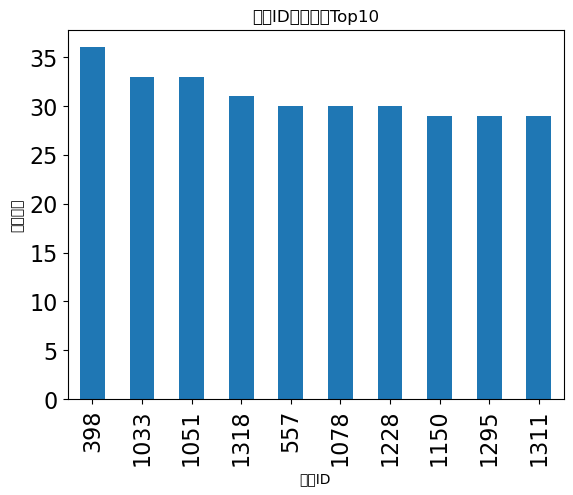

In [10]:
#订单ID点菜数量Top10（分组order_id,counts求和，排序，前十）
data['total_amounts'] =data['counts']*data['amounts']  #统计单道菜消费总额
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum()  #分组求和
sort_counts = Group_sum.sort_values(by='counts',ascending=False)
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
plt.xlabel('订单ID')
plt.ylabel('点菜数量')
plt.title('订单ID点菜数量Top10')


Text(0.5, 1.0, '消费金额前10')

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21069 (\

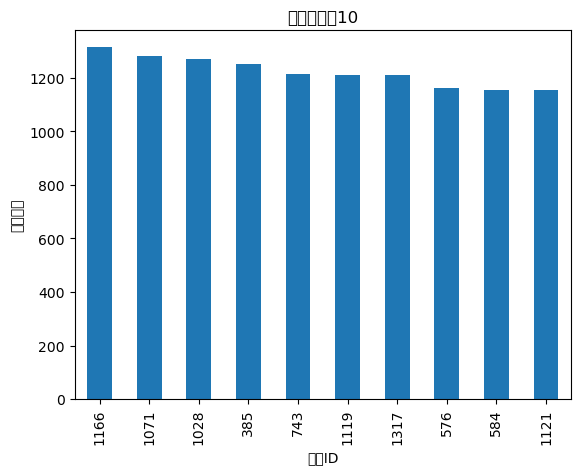

In [11]:
#ID spend money ranking
sort_total_amounts = Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费金额')
plt.title('消费金额前10')

Text(0.5, 1.0, '订单消费单价前10')

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\

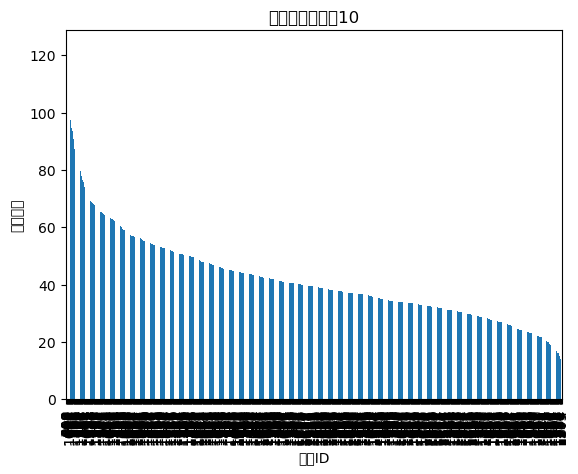

In [12]:
#which order Id spend most money
Group_sum['average'] = Group_sum['total_amounts']/Group_sum['counts']
sort_average = Group_sum.sort_values(by='average',ascending=False)
sort_average['average'][:].plot(kind='bar')
plt.xlabel('订单ID')
plt.ylabel('消费单价')
plt.title('订单消费单价前10')

Text(0.5, 1.0, '点菜数与小时的关系图')

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33756 (\N{CJK UNIFIED IDEOGRAPH-83DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\

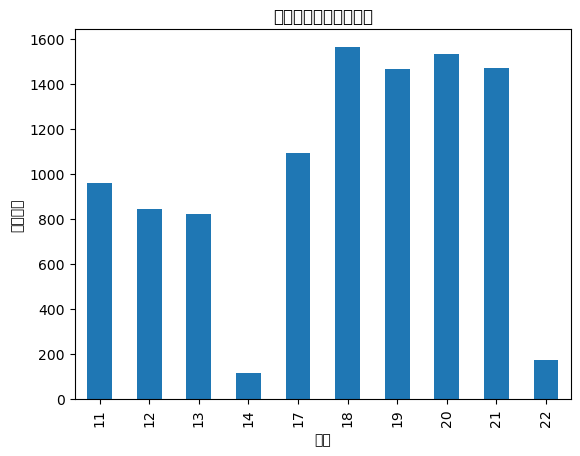

In [13]:
#high peak（hour）
data['hourcount'] = 1 
data['time'] = pd.to_datetime(data['place_order_time']) 
data['hour'] = data['time'].map(lambda x:x.hour)
gp_by_hour = data.groupby(by='hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel('小时')
plt.ylabel('点菜数量')
plt.title('点菜数与小时的关系图')

Text(0.5, 1.0, '点菜数量与日期的关系图')

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33756 (\N{CJK UNIFIED IDEOGRAPH-83DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\

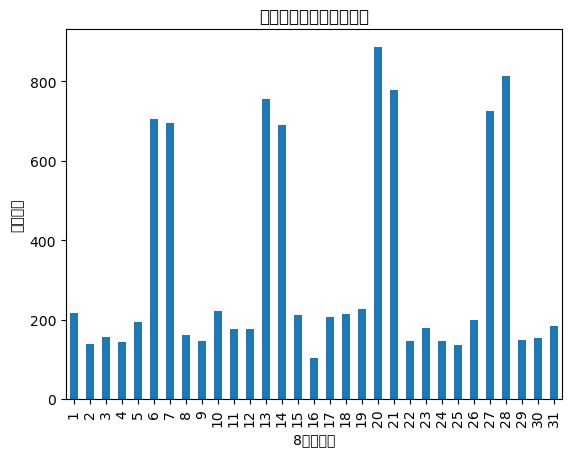

In [14]:
#which weekday is most busy
data['daycount'] = 1  
data['day'] = data['time'].map(lambda x:x.day)  
gp_by_day  = data.groupby(by='day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('8月份日期')
plt.ylabel('点菜数量')
plt.title('点菜数量与日期的关系图')



Text(0.5, 1.0, 'order amount and weeks')

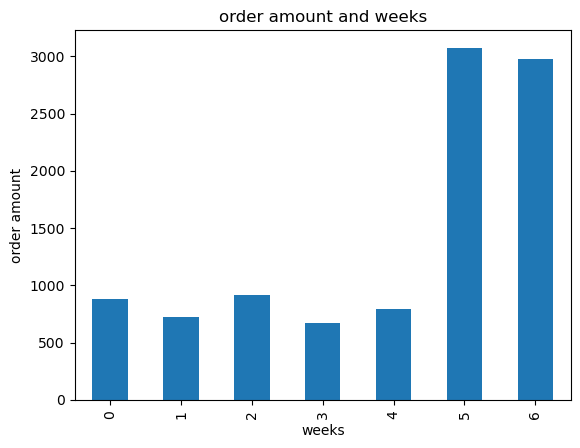

In [15]:
#which weekday has the most order amount
data['weekcount'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday())
gp_by_weekday = data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.xlabel('weeks')
plt.ylabel('order amount')
plt.title('order amount and weeks')

In [16]:
numerical = data.select_dtypes(np.number)
numerical

,detail_id,order_id,dishes_id,counts,amounts,emp_id,total_amounts,hourcount,hour,daycount,day,weekcount,weekday
0,2956,417,610062,1,49,1442,49,1,11,1,1,1,0
1,2958,417,609957,1,48,1442,48,1,11,1,1,1,0
2,2961,417,609950,1,30,1442,30,1,11,1,1,1,0
3,2966,417,610038,1,25,1442,25,1,11,1,1,1,0
4,2968,417,610003,1,13,1442,13,1,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,1,35,1089,35,1,21,1,31,1,2
3607,5686,672,609959,1,36,1089,36,1,21,1,31,1,2
3608,5379,647,610012,1,39,1094,39,1,21,1,31,1,2
3609,5380,647,610054,1,7,1094,7,1,21,1,31,1,2


In [17]:
data.isna().sum()

detail_id           0
order_id            0
dishes_id           0
dishes_name         0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
total_amounts       0
hourcount           0
time                0
hour                0
daycount            0
day                 0
weekcount           0
weekday             0
dtype: int64

In [18]:
# numerical = numerical.drop

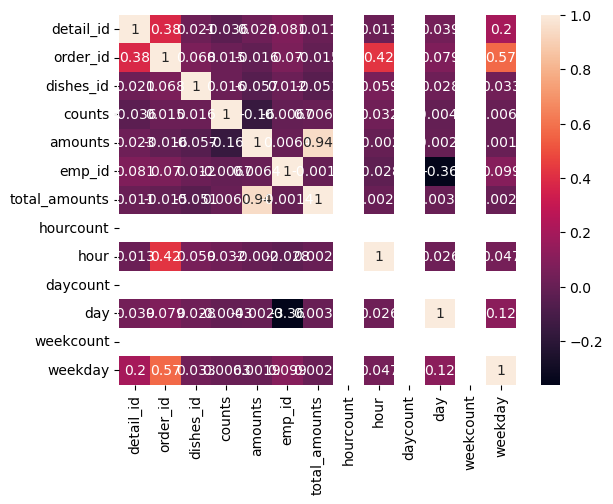

In [19]:
import seaborn as sns

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [20]:
import pandas as pd
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [21]:
# regr = DecisionTreeRegressor(max_depth=10,
#                              criterion = 'mse',
#                              min_samples_split=2,
#                              min_samples_leaf = 1,
#                              max_features = 6)

In [22]:
#X-Y Split, train-test split

X = data.drop(['dishes_id'],axis=1)
y = data['dishes_id']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#cat/num X-train
#make a split between the continuous and discrete variables as I don't want to scale or encode the discrete ones, I want to keep their current values
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)

#cat/num X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(object)


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Scale X-train
transformer = MinMaxScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)

#Scale X-test
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

,detail_id,order_id,counts,amounts,emp_id,total_amounts,hourcount,hour,daycount,day,weekcount,weekday
0,0.383958,0.285594,0.0,0.435028,0.025478,0.122029,0.0,0.818182,0.0,0.733333,0.0,0.166667
1,0.590151,0.411120,0.0,0.209040,0.164013,0.058637,0.0,0.727273,0.0,0.466667,0.0,0.000000
2,0.373148,0.278012,0.0,0.096045,0.367834,0.026941,0.0,0.727273,0.0,0.000000,0.0,0.000000
3,0.633792,0.943555,0.0,0.271186,0.929936,0.076070,0.0,0.818182,0.0,0.433333,0.0,1.000000
4,0.895903,0.590564,0.0,0.265537,0.229299,0.074485,0.0,0.000000,0.0,0.866667,0.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0.719605,0.988206,0.0,0.163842,0.291401,0.045959,0.0,0.909091,0.0,0.400000,0.0,0.833333
2004,0.311891,0.246841,0.0,0.197740,0.769108,0.055468,0.0,0.090909,0.0,0.233333,0.0,0.000000
2005,0.678366,0.465880,0.0,0.192090,0.464968,0.053883,0.0,0.545455,0.0,0.166667,0.0,0.833333
2006,0.053650,0.056445,0.0,0.180791,0.144904,0.050713,0.0,0.090909,0.0,0.733333,0.0,0.166667


In [25]:
from sklearn.preprocessing import OneHotEncoder
#Create encoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

#encode train
encoded_train = encoder.transform(X_train_cat).toarray()
encoded_train = pd.DataFrame(encoded_train)

#encode test
encoded_test = encoder.transform(X_test_cat).toarray()
encoded_test = pd.DataFrame(encoded_test)

In [26]:
train_scaled = pd.concat([encoded_train,X_scaled_train],axis=1)
test_scaled = pd.concat([encoded_test,X_scaled_test],axis=1)

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

DT = DecisionTreeRegressor()
LR = LinearRegression()
xgb = XGBRegressor()
RF = RandomForestRegressor()

model_pipeline = [DT, LR, xgb, RF]
model_names = ['Regression Tree', 'Linear Regression','XGBoost','Random Forest']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, train_scaled, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An er

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An er

{'Regression Tree': -2.724475033976437, 'Linear Regression': -2.5043353361116025e+22, 'XGBoost': 0.3196653802724143, 'Random Forest': -0.028468672306725007}


/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
#Results: {'Regression Tree': -5.11331370540921, 'Linear Regression': -1.2683340395147994e+22,
# 'XGBoost': 0.3196653802724143, 'Random Forest': -0.04334048990216077}

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

LR =RandomForestRegressor().fit(train_scaled, y_train)
pred = LR.predict(test_scaled)

/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/yingyingyhy/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
r2 = r2_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse = sqrt(mse)

In [31]:
print('R2 Score:', r2)
print('Mean Squared Error:', mse)
print('Mean aboslute Error:', mae)
print('Root Mean Squared Error:',rmse)

R2 Score: 0.7085584235325313
Mean Squared Error: 4924.814507221152
Mean aboslute Error: 3.8581822709163833
Root Mean Squared Error: 70.17702264431821


In [32]:

round(np.mean(pred),2)

609983.82

In [33]:
# from bs4 import BeautifulSoup
# import requests

In [34]:
# url = 'https://food-g-app.web.app/shop/best-foods'

In [35]:
# response = requests.get(url)
# response.status_code

200

In [36]:
# soup = BeautifulSoup(response.content, "html.parser")

In [37]:
# soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="#000000" name="theme-color"/><meta content="Web site created using create-react-app" name="description"/><link href="./svgs/tab-logo.svg" rel="icon"/><link href="/logo192.png" rel="apple-touch-icon"/><link href="/manifest.json" rel="manifest"/><link href="https://fonts.gstatic.com"/><link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;500;700&amp;display=swap" rel="stylesheet"/><title>Food G App</title><link href="/static/css/4.c7c62aa4.chunk.css" rel="stylesheet"/><link href="/static/css/main.0054d64b.chunk.css" rel="stylesheet"/></head><body><div id="root"></div><script>!function(e){function t(t){for(var n,o,c=t[0],i=t[1],f=t[2],l=0,d=[];l<c.length;l++)o=c[l],Object.prototype.hasOwnProperty.call(a,o)&&a[o]&&d.push(a[o][0]),a[o]=0;for(n in i)Object.prototype.hasOwnProperty.call(i,n)&&(e[n]=i[n]);for(s&&s(t);d.length;)d.shift()(

In [38]:
from bs4 import BeautifulSoup
import requests
from time import sleep
from random import randint
import pandas as pd

In [39]:
import requests
import pandas as pd
import json
import getpass
rapidAPIkey = getpass.getpass()

········


In [40]:
#web scaping for whisky
res2 = requests.get('https://whiskyhunter.net/api/auctions_data/')
res2

<Response [200]>

In [41]:
data2 = res2.json()
data2

[{'dt': '2023-01-01',
  'winning_bid_max': 15517.5,
  'winning_bid_min': 5.3,
  'winning_bid_mean': 214.11,
  'auction_trading_volume': 1095407.3,
  'auction_lots_count': 5116,
  'all_auctions_lots_count': 26488,
  'auction_name': 'Catawiki Whisky Auction',
  'auction_slug': 'catawiki'},
 {'dt': '2023-01-01',
  'winning_bid_max': 8700.0,
  'winning_bid_min': 2.5,
  'winning_bid_mean': 189.46,
  'auction_trading_volume': 312610.62,
  'auction_lots_count': 1650,
  'all_auctions_lots_count': 26488,
  'auction_name': 'Just Whisky Auctions',
  'auction_slug': 'just-whisky'},
 {'dt': '2023-01-01',
  'winning_bid_max': 2500.0,
  'winning_bid_min': 10.0,
  'winning_bid_mean': 139.71,
  'auction_trading_volume': 19560.0,
  'auction_lots_count': 140,
  'all_auctions_lots_count': 26488,
  'auction_name': 'McTear’s Whisky Auction',
  'auction_slug': 'mctears'},
 {'dt': '2023-01-01',
  'winning_bid_max': 6200.0,
  'winning_bid_min': 15.0,
  'winning_bid_mean': 170.65,
  'auction_trading_volume': 15

In [42]:
df = pd.DataFrame(data2)
df

,dt,winning_bid_max,winning_bid_min,winning_bid_mean,auction_trading_volume,auction_lots_count,all_auctions_lots_count,auction_name,auction_slug
0,2023-01-01,15517.5,5.3,214.11,1095407.30,5116,26488,Catawiki Whisky Auction,catawiki
1,2023-01-01,8700.0,2.5,189.46,312610.62,1650,26488,Just Whisky Auctions,just-whisky
2,2023-01-01,2500.0,10.0,139.71,19560.00,140,26488,McTear’s Whisky Auction,mctears
3,2023-01-01,6200.0,15.0,170.65,152223.00,892,26488,Rum Auctioneer,rumauctioneer
4,2023-01-01,56000.0,6.0,412.83,511904.28,1240,26488,The Grand Whisky Auction,thegrandwhiskyauction
...,...,...,...,...,...,...,...,...,...
1536,2006-03-01,830.0,1.0,47.07,36619.00,778,778,WhiskyAuction.com,whiskyauctioncom
1537,2006-02-01,1194.0,1.0,44.11,42961.00,974,974,WhiskyAuction.com,whiskyauctioncom
1538,2006-01-01,981.0,1.0,58.01,54179.00,934,934,WhiskyAuction.com,whiskyauctioncom
1539,2005-12-01,1247.0,1.0,50.74,47492.00,936,936,WhiskyAuction.com,whiskyauctioncom


In [43]:
#convert to csv for further analyse on tableau
df.to_csv('df.csv', index=False)